In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import LightSource
%matplotlib notebook

In [2]:
plt.rcParams["font.size"] = 14

## First draw weyl chamber
Ref: "Geometric theory of nonlocal two-qubit operations" Jun Zhang et al.

In [3]:
O = [0,0,0]
A1 = [np.pi/2,0,0]
A2 = [np.pi/4,np.pi/4,0]
A3 = [np.pi/4, np.pi/4, np.pi/4]
L = [np.pi/4,0,0]
# the above is the paper's values
# we shift the region where x > pi/4 by shifting it by pi/2 (which is a trivial local equivalence) for convinience 
# then we have to define three more points
# A1 goes to O
# but L goes to [-np.pi/4,0,0] which we name L_ (locally equivalent to L)
# also A2 goes to [-np.pi/4,np.pi/4,0] which we name A2_ (locally equivalent to A2)
# also A3 goes to [-np.pi/4,np.pi/4,np.pi/4] which we name A3_ (locally equivalent to A3)
L_ = [-np.pi/4,0,0]
A2_ = [-np.pi/4,np.pi/4,0]
A3_ = [-np.pi/4, np.pi/4, np.pi/4]

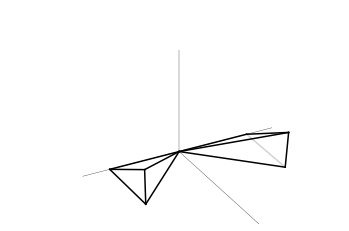

In [4]:

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax.w_xaxis.line.set_color("grey")
ax.w_yaxis.line.set_color("grey")
ax.w_zaxis.line.set_color("grey")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])
plt.axis('off')
ax.set_xlim(np.pi/4+0.1,-np.pi/4-0.1)
ax.set_ylim(np.pi/4+0.1,-np.pi/4-0.1)
ax.set_zlim(0,np.pi/2+0.2)
ax.view_init(elev=46., azim=-118)

# draw chamber
ax.plot(*[[O[i], L[i]] for i in range(3)], color="black") #OL
ax.plot(*[[O[i], A2[i]] for i in range(3)], color="black") #OA2
ax.plot(*[[O[i], A3[i]] for i in range(3)], color="black") #OA3
ax.plot(*[[L[i], A2[i]] for i in range(3)], color="black") #LA2
ax.plot(*[[L[i], A3[i]] for i in range(3)], color="black") #LA3
ax.plot(*[[A2[i], A3[i]] for i in range(3)], color="black") #A2A3
ax.plot(*[[O[i], L_[i]] for i in range(3)], color="black") 
ax.plot(*[[O[i], A2_[i]] for i in range(3)], color="black")
ax.plot(*[[O[i], A3_[i]] for i in range(3)], color="black")
ax.plot(*[[L_[i], A2_[i]] for i in range(3)], color="lightgray", zorder=1) #LA2
ax.plot(*[[L_[i], A3_[i]] for i in range(3)], color="black") #LA3
ax.plot(*[[A2_[i], A3_[i]] for i in range(3)], color="black") #A2A3
ax.plot([0,0],[0,0],[0,np.pi/2+0.6], color="black", linewidth=0.3) # z axis
ax.plot([0,0],[0,np.pi/2+0.6],[0,0], color="black", linewidth=0.3) # y axis
ax.plot([-np.pi/4-0.3,np.pi/4+0.3],[0,0],[0,0], color="black", linewidth=0.3) # x axis
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")


plt.show()

## colormap $W_U$


$W(U)$ is defined for a unitary
$$ U = \exp(\theta_x\sigma_x\otimes \sigma_x + \theta_y\sigma_y\otimes \sigma_y + \theta_z\sigma_z\otimes \sigma_z),$$
which can be expanded as,
$$ U = \sum_\alpha u_\alpha \sigma_\alpha \otimes \sigma_\alpha.$$

In [5]:
def get_u_vec(x,y,z):
    u_vec = []
    u_vec.append(cos(x)*cos(y)*cos(z)+1j*sin(x)*sin(y)*sin(z))
    u_vec.append(cos(x)*sin(y)*sin(z)+1j*sin(x)*cos(y)*cos(z))
    u_vec.append(sin(x)*cos(y)*sin(z)+1j*cos(x)*sin(y)*cos(z))
    u_vec.append(sin(x)*sin(y)*cos(z)+1j*cos(x)*cos(y)*sin(z))
    u_vec = np.array(u_vec)
    return u_vec

def get_same_alpha_cost(u_vec):
    ret = 0
    for u in u_vec:
        ret += np.abs(u)**2
    return ret

def get_different_alpha_cost(u_vec):
    ret = 0
    for i in range(4):
        for j in range(4):
            if i!=j:
                ret += np.abs(u_vec[i]*np.conj(u_vec[j]) - u_vec[j]*np.conj(u_vec[i]))
                ret += np.abs(u_vec[i]*np.conj(u_vec[j]) + u_vec[j]*np.conj(u_vec[i]))
    return ret


### function for calculating $W_U$

In [6]:
from numpy import sin, cos
def get_WU(x,y,z):
    u_vec = get_u_vec(x,y,z)
    ret = 0
    ret += get_same_alpha_cost(u_vec)
    ret += get_different_alpha_cost(u_vec)
    return ret                

# Prepare data

### get color map

In [7]:
minn, maxx = 1, 9
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])

data for LA2A3 surface

In [8]:
# LA2A3 can be written as,
# y = t, 0 < z < t
# x = np.pi/4
# A1A2A3 can be written as
# and z = s where s < t
X_la2a3 = []; Y_la2a3 = []; Z_la2a3 = []
n_grid = 50
for t in np.linspace(0, np.pi/4, n_grid):
    X_la2a3.append(np.zeros(n_grid)+np.pi/4)
    Y_la2a3.append(np.zeros(n_grid)+t)
    Z_la2a3.append(np.linspace(0,t))
X_la2a3 = np.array(X_la2a3); Y_la2a3 = np.array(Y_la2a3); Z_la2a3 = np.array(Z_la2a3)

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
# change to desired fourth dimension
fcolors_la2a3 = m.to_rgba(get_WU(X_la2a3,Y_la2a3,Z_la2a3))
print(np.max(get_WU(X_la2a3,Y_la2a3,Z_la2a3)))

8.872979148612904


data for OlA3

In [9]:
# OlA3 can be written as,
# y = t
# t < x < pi/4
# z = t

X_ola3 = []; Y_ola3 = []; Z_ola3 = []
n_grid = 50
for t in np.linspace(0, np.pi/4, n_grid):
    X_ola3.append(np.linspace(t, np.pi/4, n_grid))
    Y_ola3.append(np.zeros(n_grid)+t)
    Z_ola3.append(np.zeros(n_grid)+t)
X_ola3 = np.array(X_ola3); Y_ola3 = np.array(Y_ola3); Z_ola3 = np.array(Z_ola3)

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
# change to desired fourth dimension
fcolors_ola3 = m.to_rgba(get_WU(X_ola3,Y_ola3,Z_ola3))


In [10]:
# OA2A3 can be written as,
# x = y = t
# 0 < z < t

X_oa2a3 = []; Y_oa2a3 = []; Z_oa2a3 = []
n_grid = 50
for t in np.linspace(0, np.pi/4, n_grid):
    X_oa2a3.append(np.zeros(n_grid)+t)
    Y_oa2a3.append(np.zeros(n_grid)+t)
    Z_oa2a3.append(np.linspace(0,t,n_grid))
X_oa2a3 = np.array(X_oa2a3); Y_oa2a3 = np.array(Y_oa2a3); Z_oa2a3 = np.array(Z_oa2a3)

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
# change to desired fourth dimension
fcolors_oa2a3 = m.to_rgba(get_WU(X_oa2a3,Y_oa2a3,Z_oa2a3))

In [11]:
# OLA2 can be written as:
# z = 0
# x = t
# 0<y<t
# OA2A3 can be written as,
# x = y = t
# 0 < z < t

X_ola2 = []; Y_ola2 = []; Z_ola2 = []
n_grid = 50
for t in np.linspace(0, np.pi/4, n_grid):
    X_ola2.append(np.zeros(n_grid)+t)
    Y_ola2.append(np.linspace(0,t,n_grid))
    Z_ola2.append(np.zeros(n_grid))
X_ola2 = np.array(X_ola2); Y_ola2 = np.array(Y_ola2); Z_ola2 = np.array(Z_ola2)

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
# change to desired fourth dimension
fcolors_ola2 = m.to_rgba(get_WU(X_ola2,Y_ola2,Z_ola2))

# Plot

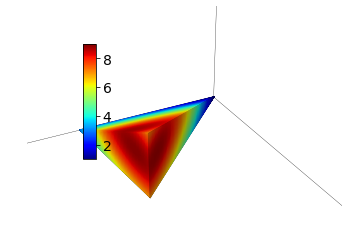

In [12]:

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax.w_xaxis.line.set_color("grey")
ax.w_yaxis.line.set_color("grey")
ax.w_zaxis.line.set_color("grey")
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])
plt.axis('off')
ax.set_xlim(np.pi/4+0.1, 0)
ax.set_ylim(np.pi/4+0.1, 0)
ax.set_zlim(0,np.pi/4+0.2)
ax.view_init(elev=46., azim=-118)

# draw chamber
ax.plot(*[[O[i], L[i]] for i in range(3)], color="black") #OL
ax.plot(*[[O[i], A2[i]] for i in range(3)], color="black") #OA2
ax.plot(*[[O[i], A3[i]] for i in range(3)], color="black") #OA3
ax.plot(*[[L[i], A2[i]] for i in range(3)], color="black") #LA2
ax.plot(*[[L[i], A3[i]] for i in range(3)], color="black") #LA3
ax.plot(*[[A2[i], A3[i]] for i in range(3)], color="black") #A2A3

ax.plot([0,0],[0,0],[0,np.pi+0.6], color="black", linewidth=0.3) # z axis
ax.plot([0,0],[0,np.pi/2+0.6],[0,0], color="black", linewidth=0.3) # y axis
ax.plot([0,np.pi/4+0.3],[0,0],[0,0], color="black", linewidth=0.3) # x axis

# plot plane
# #LA2A3
surf = ax.plot_surface(X_la2a3,Y_la2a3,Z_la2a3, rstride=1, cstride=1, \
                       facecolors=fcolors_la2a3, vmin=minn, vmax=maxx, shade=True)

# OLA3
surf = ax.plot_surface(X_ola3,Y_ola3,Z_ola3, rstride=1, cstride=1, \
                       facecolors=fcolors_ola3, vmin=minn, vmax=maxx, shade=True)

# OA2A3
surf = ax.plot_surface(X_oa2a3,Y_oa2a3,Z_oa2a3, rstride=1, cstride=1, \
                       facecolors=fcolors_oa2a3, vmin=minn, vmax=maxx, shade=True)

# OLA2
surf = ax.plot_surface(X_ola2,Y_ola2,Z_ola2, rstride=1, cstride=1, \
                       facecolors=fcolors_ola2, vmin=minn, vmax=maxx, shade=False)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")

cax = fig.add_axes([0.3, 0.35, 0.03, 0.4])
cbar = plt.colorbar(m, cax=cax)

plt.show()